In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.manifold import MDS


In [ ]:
df1 = pd.read_csv('student-mat.csv',delimiter=';')  
df2 = pd.read_csv('student-por.csv',delimiter=';')

df2.shape

(649, 33)

In [ ]:
df3=pd.merge(df1,df2,how='outer')

print(df3.shape)


(1044, 33)


In [ ]:
df3['AverageGrade'] = df3[['G1', 'G2', 'G3']].mean(axis='columns')
df3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,AverageGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


### Data Processing





In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        1044 non-null   object 
 1   sex           1044 non-null   object 
 2   age           1044 non-null   int64  
 3   address       1044 non-null   object 
 4   famsize       1044 non-null   object 
 5   Pstatus       1044 non-null   object 
 6   Medu          1044 non-null   int64  
 7   Fedu          1044 non-null   int64  
 8   Mjob          1044 non-null   object 
 9   Fjob          1044 non-null   object 
 10  reason        1044 non-null   object 
 11  guardian      1044 non-null   object 
 12  traveltime    1044 non-null   int64  
 13  studytime     1044 non-null   int64  
 14  failures      1044 non-null   int64  
 15  schoolsup     1044 non-null   object 
 16  famsup        1044 non-null   object 
 17  paid          1044 non-null   object 
 18  activities    1044 non-null 

In [ ]:
df3.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,AverageGrade
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,11.267241
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,3.218805
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,9.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,11.333333
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


In [ ]:
df3.isna().any()

school          False
sex             False
age             False
address         False
famsize         False
Pstatus         False
Medu            False
Fedu            False
Mjob            False
Fjob            False
reason          False
guardian        False
traveltime      False
studytime       False
failures        False
schoolsup       False
famsup          False
paid            False
activities      False
nursery         False
higher          False
internet        False
romantic        False
famrel          False
freetime        False
goout           False
Dalc            False
Walc            False
health          False
absences        False
G1              False
G2              False
G3              False
AverageGrade    False
dtype: bool

### HEATMAP

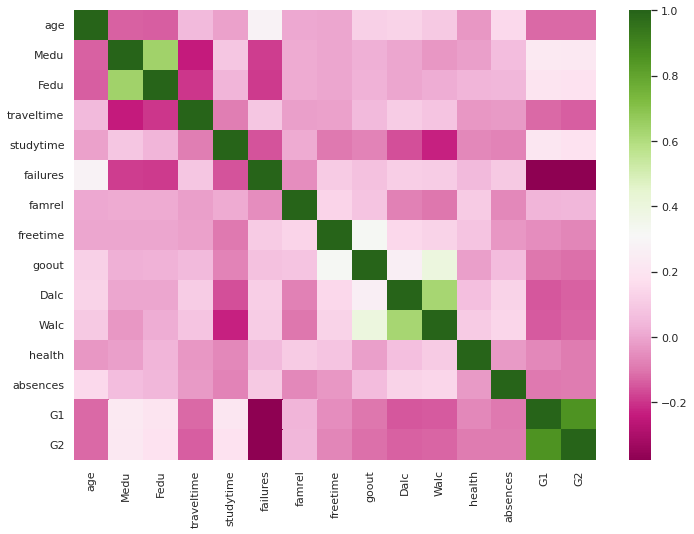

In [ ]:
heatmap_df = df3.copy()
heatmap_df = heatmap_df.drop(['G3','AverageGrade'],axis=1)
corr1= heatmap_df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr1, xticklabels=corr1.columns,
        yticklabels=corr1.columns,  cmap='PiYG')

### EDA

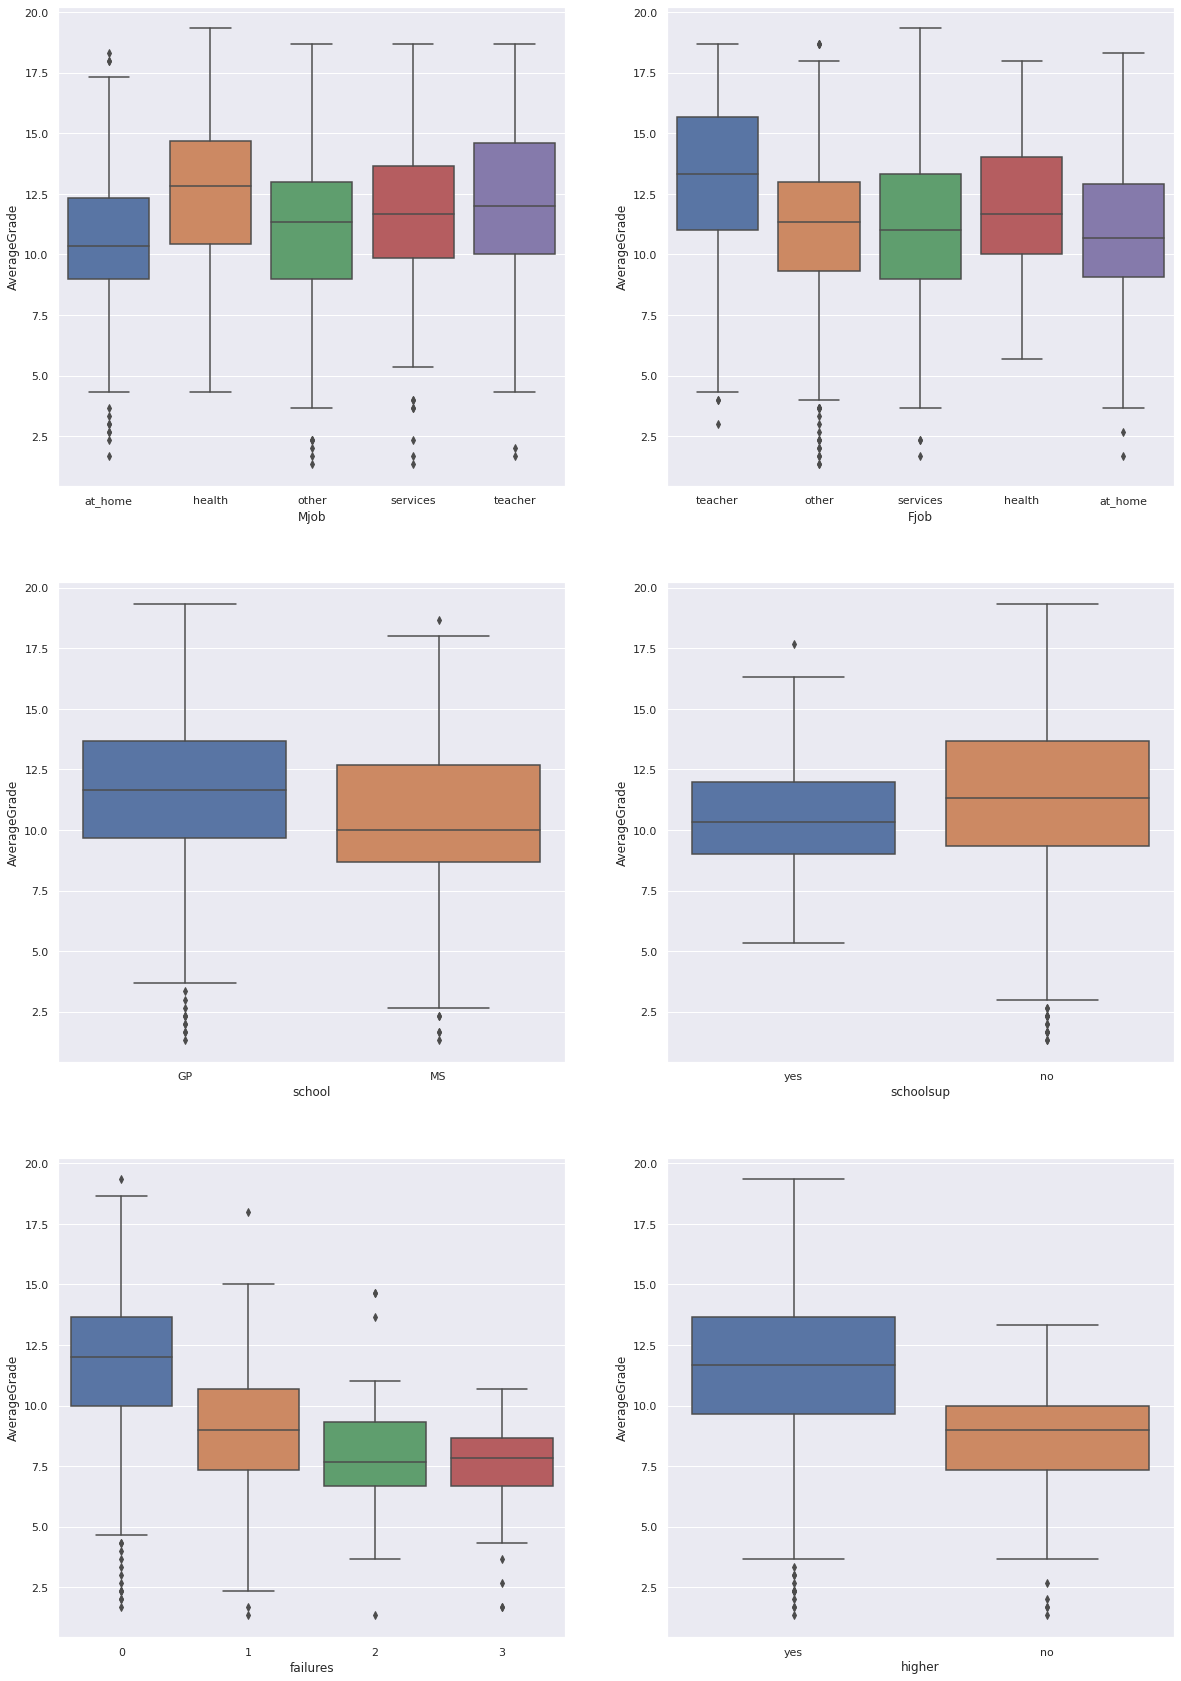

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 30))

sns.boxplot(ax=axes[0, 0],x="Mjob", y="AverageGrade", data=df3)
sns.boxplot(ax=axes[0, 1],x="Fjob", y="AverageGrade", data=df3)
sns.boxplot(ax=axes[1, 0],x="school", y="AverageGrade", data=df3)



sns.boxplot(ax=axes[1, 1],x="schoolsup", y="AverageGrade", data=df3)


sns.boxplot(ax=axes[2, 0],x="failures", y="AverageGrade", data=df3)

sns.boxplot(ax=axes[2, 1],x="higher", y="AverageGrade", data=df3)




/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


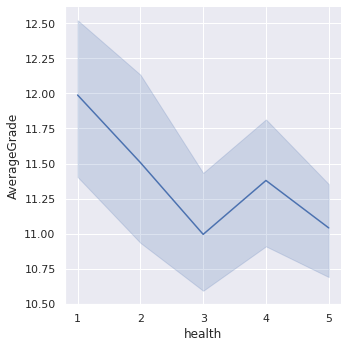

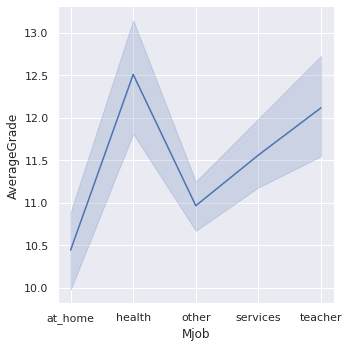

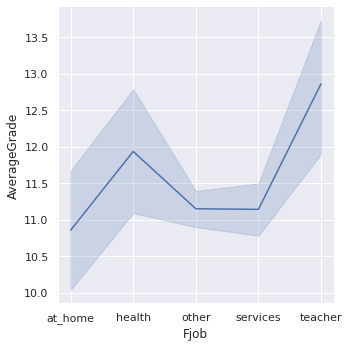

In [ ]:

#sns.distplot(x=df3["traveltime"])
#fig, axes = plt.subplots(2, 2, figsize=(20, 30))


sns.relplot(ax=axes[0, 0],
    data=df3, kind="line",
    x="health", y="AverageGrade",
    
    facet_kws=dict(sharex=False),
)
  
sns.relplot(ax=axes[0, 1],
    data=df3.sort_values(by="Mjob"), kind="line",
    x="Mjob", y="AverageGrade",
    
    facet_kws=dict(sharex=False),
)
sns.relplot(ax=axes[1, 0],
    data=df3.sort_values(by="Fjob"), kind="line",
    x="Fjob", y="AverageGrade",
    
    facet_kws=dict(sharex=False),
)

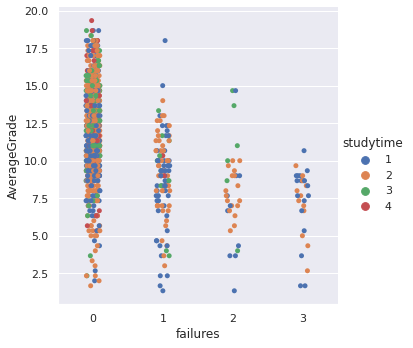

In [ ]:
g=sns.catplot(x="failures", y="AverageGrade",hue="studytime", data=df3)

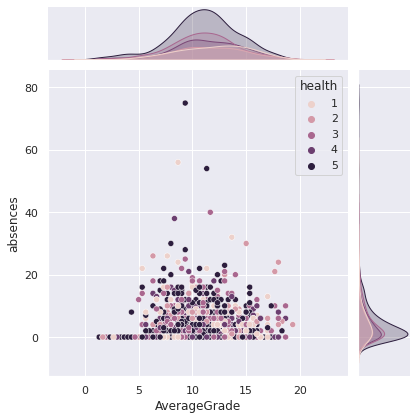

In [ ]:
sns.jointplot(data=df3, x="AverageGrade", y="absences", hue="health")

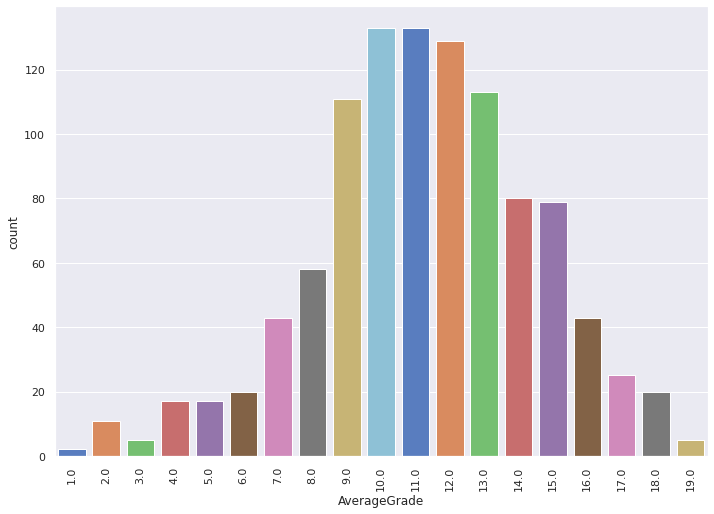

In [ ]:
df4 = df3.copy()
import math
df4.AverageGrade = df4['AverageGrade'].apply(lambda x:round(x,0) )
p = sns.countplot(x="AverageGrade", data = df4, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)


In [ ]:
df3['Medu'] = df3['Medu'].map({1:'class1',2:'class1',3:'class1',4:'class1',})
df3['Fedu'] = df3['Fedu'].map({1:'class1',2:'class1',3:'class1',4:'class1',})
df3['traveltime'] = df3['traveltime'].map({1:'class1',2:'class1',3:'class1',4:'class1',})
df3['studytime'] = df3['studytime'].map({1:'class1',2:'class1',3:'class1',4:'class1',})
df3['failures'] = df3['failures'].map({1:'class1',2:'class1',3:'class1',4:'class1',})
df3['famrel'] = df3['famrel'].map({1:'class1',2:'class1',3:'class1',4:'class1',})
df3['freetime'] = df3['freetime'].map({1:'class1',2:'class1',3:'class1',4:'class1',})
df3['goout'] = df3['goout'].map({1:'class1',2:'class1',3:'class1',4:'class1',})
df3['Dalc'] = df3['Dalc'].map({1:'class1',2:'class1',3:'class1',4:'class1',})
df3['Walc'] = df3['Walc'].map({1:'class1',2:'class1',3:'class1',4:'class1',})
df3['health'] = df3['health'].map({1:'class1',2:'class1',3:'class1',4:'class1',})
df3['absences'] = df3['absences'].map({1:'class1',2:'class1',3:'class1',4:'class1',})

### MDS

In [ ]:
mds_df = df3.copy()
mds_df = mds_df.drop(['G3','AverageGrade'],axis=1)
x = pd.get_dummies(mds_df)
embedding = MDS(30)

In [ ]:
X_transformed = embedding.fit_transform(x)

In [ ]:
X_transformed.shape

(1044, 30)

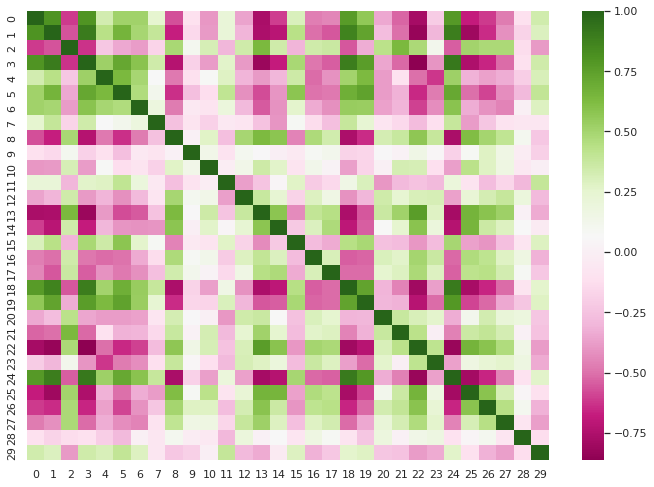

In [ ]:
snd = pd.DataFrame(X_transformed)
corr2 = snd.corr()
sns.heatmap(corr2, xticklabels=corr2.columns,
        yticklabels=corr2.columns,  cmap='PiYG')

### PCA

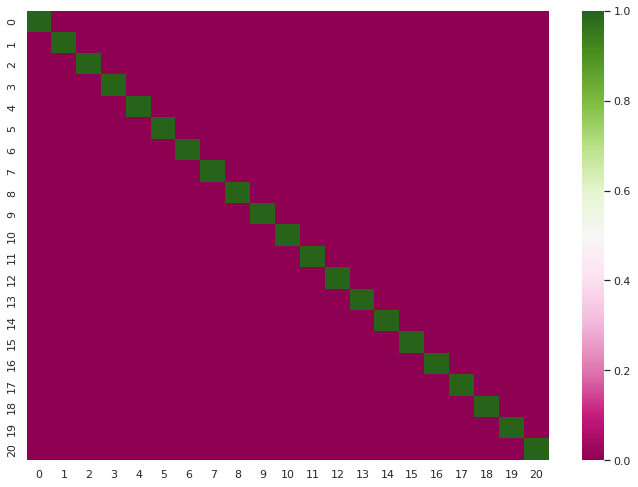

In [ ]:
X_transformed = PCA(0.95).fit_transform(X_transformed)
snd = pd.DataFrame(X_transformed)
corr2 = snd.corr()
sns.heatmap(corr2, xticklabels=corr2.columns,
        yticklabels=corr2.columns,  cmap='PiYG')

### Train Test Split

In [ ]:
x = snd.copy()
y = df3["G3"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### GridSearch CV


Linear Regression


In [ ]:
params = [{'max_depth': list(range(5, 10)), 'max_features': list(range(10,22))}]
lr = LinearRegression()
params = {'fit_intercept': ('True','False'),'copy_X':[True, False] }
clf = GridSearchCV(lr, params, cv = 10)
clf.fit(x_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'copy_X': True, 'fit_intercept': 'True'}
0.8280095950284201


Regression Trees

In [ ]:

dtr = DecisionTreeRegressor()
params = {'criterion':['quared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter':('best','random'), 'max_depth': list(range(2,5)), 'min_samples_split':[1,2,3,4,5,6], }
clf = GridSearchCV(dtr, params, cv = 10)
clf.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a fl

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['quared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'splitter': ('best', 'random')})

In [ ]:

print(clf.best_params_)

print(clf.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 4, 'min_samples_split': 2, 'splitter': 'best'}
0.7983854930448654


SVR

In [ ]:
svr = SVR()
params ={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1,2,3,4], 'gamma':('scale','auto'), 'shrinking': [True,False]}
clf = GridSearchCV(svr, params, cv = 10)
clf.fit(x_train, y_train)



GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'degree': [1, 2, 3, 4], 'gamma': ('scale', 'auto'),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]})

In [ ]:
print(clf.best_params_)

print(clf.best_score_)

{'degree': 1, 'gamma': 'auto', 'kernel': 'poly', 'shrinking': False}
0.8270217447085824


Random Forest Regression

In [ ]:
rfr = RandomForestRegressor()
params ={'criterion':['squared_error', 'absolute_error', 'poisson'], 'max_depth':[3,4,5]}
clf = GridSearchCV(rfr, params, cv = 10)
clf.fit(x_train, y_train)



GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 4, 5]})

In [ ]:
print(clf.best_params_)

print(clf.best_score_)

{'criterion': 'absolute_error', 'max_depth': 4}
0.8135255687880818


Bayesian Regression

In [ ]:
byr = linear_model.BayesianRidge()
params = {'n_iter':[50,100,250], 'alpha_1':[1e-4,1e-6,1e-8],'alpha_2':[1e-4,1e-6,1e-8],'lambda_1':[1e-4,1e-6,1e-8],'lambda_2':[1e-4,1e-6,1e-8] }
clf = GridSearchCV(byr, params, cv = 10)
clf.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=BayesianRidge(),
             param_grid={'alpha_1': [0.0001, 1e-06, 1e-08],
                         'alpha_2': [0.0001, 1e-06, 1e-08],
                         'lambda_1': [0.0001, 1e-06, 1e-08],
                         'lambda_2': [0.0001, 1e-06, 1e-08],
                         'n_iter': [50, 100, 250]})

In [ ]:
print(clf.best_params_)

print(clf.best_score_)

{'alpha_1': 1e-08, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 1e-08, 'n_iter': 50}
0.8295440660324032


### CROSS VALIDATION

In [ ]:
stratifiedkf=StratifiedKFold()

Bayesian Regression


In [ ]:
byr = linear_model.BayesianRidge(alpha_1= 1e-08, alpha_2 = 0.0001, lambda_1 = 0.0001, lambda_2 = 1e-08, n_iter = 200)
score=cross_val_score(byr,x,y,cv=stratifiedkf)
np.mean(score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.8257403604422551

Random Forest Regression

In [ ]:
rfr = RandomForestRegressor(criterion= 'squared_error' , max_depth = 4)
score=cross_val_score(byr,x,y,cv=stratifiedkf)
np.mean(score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.8257403604422551

Regression Trees

In [ ]:
dtr = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 4, min_samples_split= 2, splitter ='best')
score=cross_val_score(byr,x,y,cv=stratifiedkf)
np.mean(score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.825740349383177

SVM Regressor

In [ ]:
svr = SVR(kernel ='poly', gamma='auto',degree= 1,shrinking=False)
score=cross_val_score(svr,x,y,cv=stratifiedkf)
np.mean(score) #svc

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.8251415356686074

Linear Regression

In [ ]:
reg = LinearRegression(fit_intercept=True,copy_X=True).fit(x, y)
score=cross_val_score(reg,x,y,cv=stratifiedkf)
np.mean(score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.8244809314932535

### MODEL BUILDING

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(snd, y, test_size=0.33, random_state=42)

Decision Tree Regressor

In [ ]:
dtr.fit(x_train,y_train)
print("Train set accuracy:",dtr.score(x_train,y_train))
print("Test set accuracy:",dtr.score(x_test,y_test))
y_pred = dtr.predict(x_test)

Train set accuracy: 0.8338492041605716
Test set accuracy: 0.7676463204142752


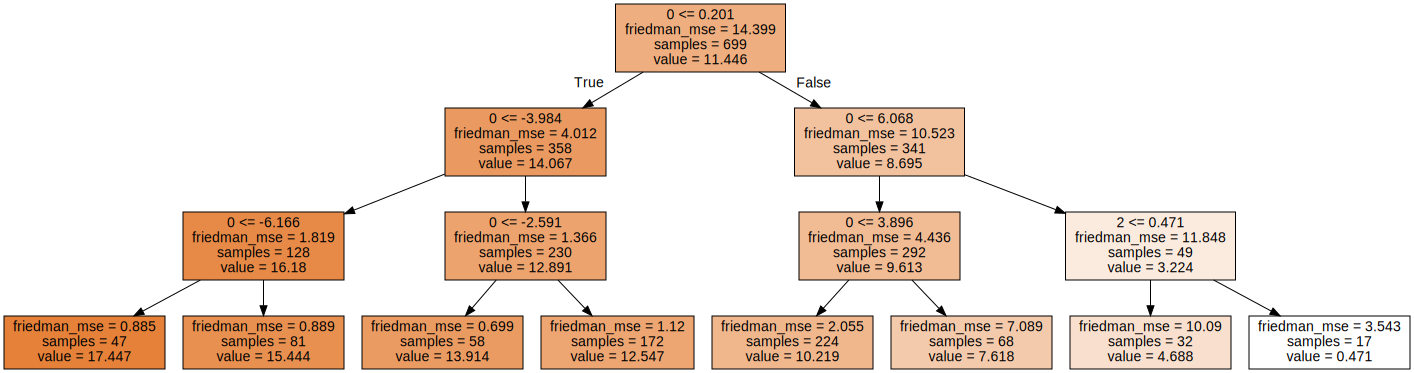

In [ ]:

dot_data = tree.export_graphviz(dtr, out_file=None, 
                                feature_names=x_train.columns,  
                                class_names=y_train,
                              filled = True)

graph = graphviz.Source(dot_data, format="png") 
graph


Random Forest Regressor

In [ ]:

rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

print("Train set accuracy:",rfr.score(x_train,y_train))
print("Test set accuracy:",rfr.score(x_test,y_test))


Train set accuracy: 0.8948527464595791
Test set accuracy: 0.7940418762623547


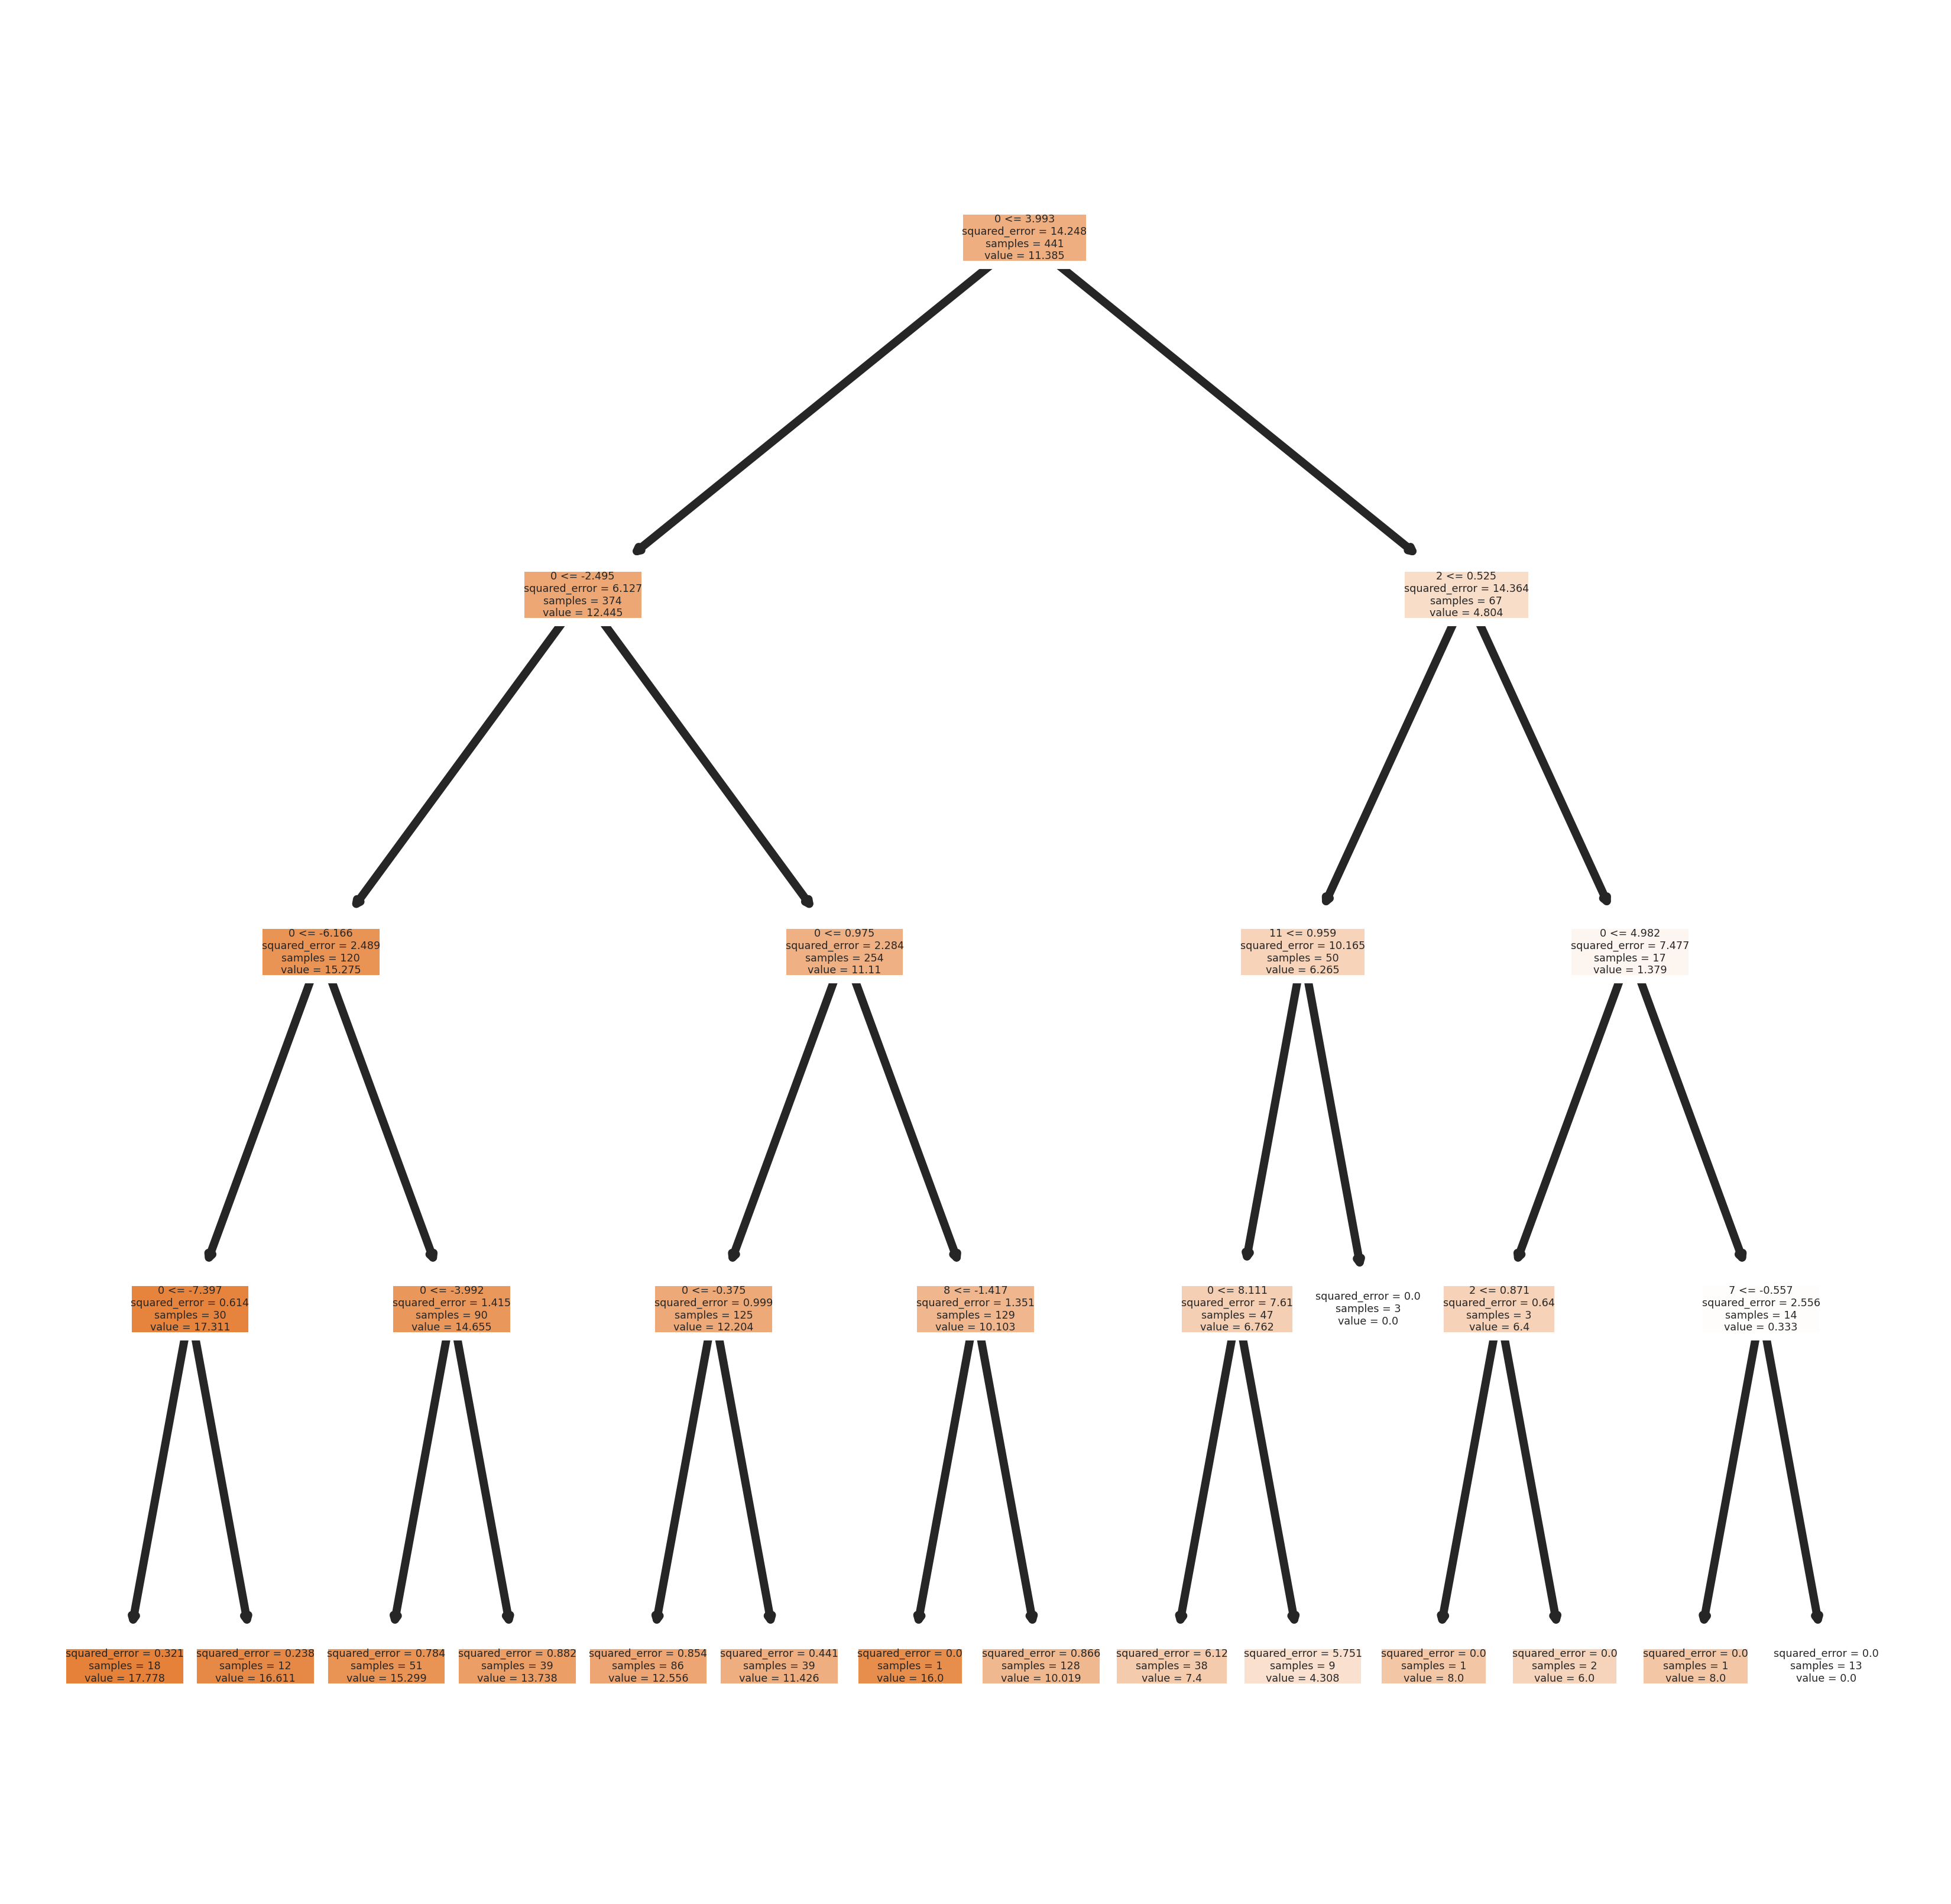

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(rfr.estimators_[0],
               feature_names = x_train.columns, 
               class_names=y_train,
               filled = True);
fig.savefig('tree.png')

Linear Regression

In [ ]:

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print("Train set accuracy:",lr.score(x_train,y_train))
print("Test set accuracy:",lr.score(x_test,y_test))

Train set accuracy: 0.8464503183266493
Test set accuracy: 0.8134910171494104


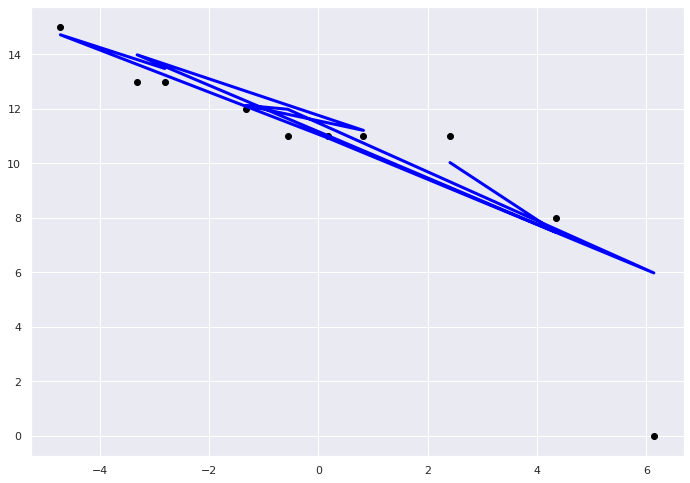

In [ ]:
pca =PCA(1)
plot_x_train = pca.fit_transform(x_train)
plot_x_test = pca.fit_transform(x_test)

plt.scatter(plot_x_test[:10], y_test[:10], color="black")
plt.plot(plot_x_test[:10], y_pred[:10], color="blue", linewidth=3)


SVM Regressor

In [ ]:
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

print("Train set accuracy:",svr.score(x_train,y_train))
print("Test set accuracy:",svr.score(x_test,y_test))

Train set accuracy: 0.8370379859140231
Test set accuracy: 0.8082192341636634


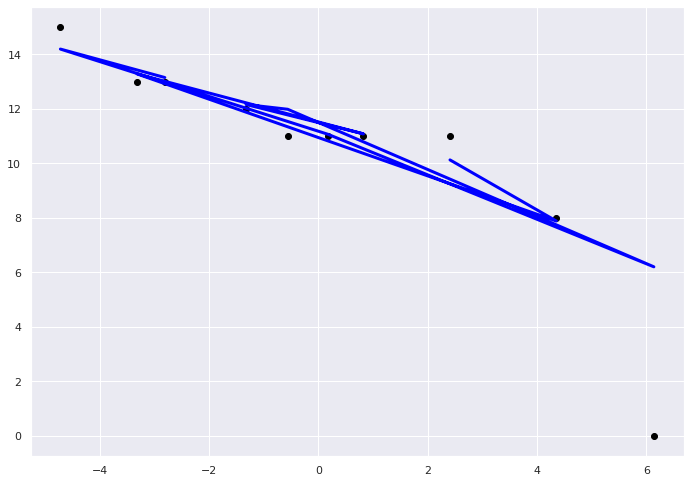

In [ ]:

plt.scatter(plot_x_test[:10], y_test[:10], color="black")
plt.plot(plot_x_test[:10], y_pred[:10], color="blue", linewidth=3)


Bayesian Regressor

In [ ]:
byr.fit(x_train,y_train)
y_pred = byr.predict(x_test)

print("Train set accuracy:",byr.score(x_train,y_train))
print("Test set accuracy:",byr.score(x_test,y_test))

Train set accuracy: 0.8462717431557225
Test set accuracy: 0.8138689191467567


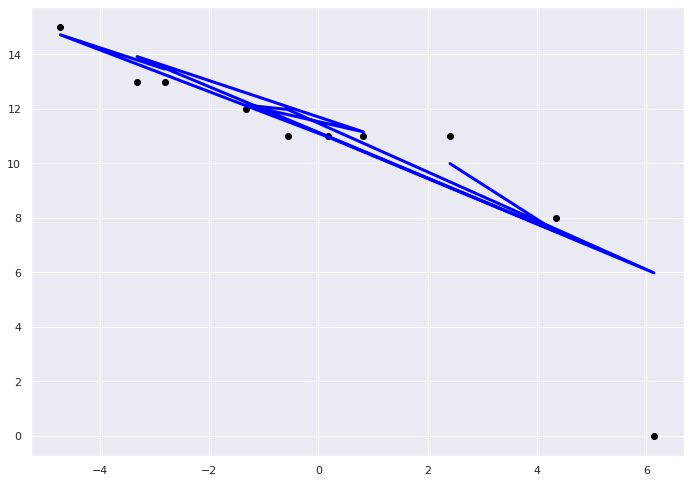

In [ ]:

plt.scatter(plot_x_test[:10], y_test[:10], color="black")
plt.plot(plot_x_test[:10], y_pred[:10], color="blue", linewidth=3)


ANN

In [ ]:
def creatingmodel(optimizer="adam",loss="mse"):
    model=Sequential()
    model.add(Dense(150,input_dim=21,activation="relu"))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(85,activation="relu"))
    model.add(Dense(75,activation="relu"))
    model.add(Dense(63,activation="relu"))
    model.add(Dense(56,activation="relu"))
    model.add(Dense(18,activation="relu"))
    model.add(Dense(9,activation="relu"))
    model.add(Dense(1,activation="relu"))
    model.compile(optimizer=optimizer,loss=loss)
    return model
model=creatingmodel()


In [ ]:
callbacks=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=400)

In [ ]:
model.fit(x=x_train,y=y_train,
         validation_data=(x_test,y_test),
         epochs=1000,batch_size=20,verbose=1,callbacks=[callbacks])

Epoch 1/1000
35/35 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 4.1508
Epoch 2/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 4.1654
Epoch 3/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 4.1185
Epoch 4/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 4.2240
Epoch 5/1000
35/35 [==============================] - 0s 5ms/step - loss: 0.0145 - val_loss: 4.1872
Epoch 6/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0304 - val_loss: 4.2691
Epoch 7/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0318 - val_loss: 4.2919
Epoch 8/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 4.2146
Epoch 9/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 4.3914
Epoch 10/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 4.0812

In [ ]:
out=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                   r2_score(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean squared error","root mean squared error",
                                 "r2 score","explained_variance_score"])

out

,mean squared error,root mean squared error,r2 score,explained_variance_score
0,3.052444,1.747125,0.808219,0.80887


In [ ]:
y_pred =model.predict(x_test)

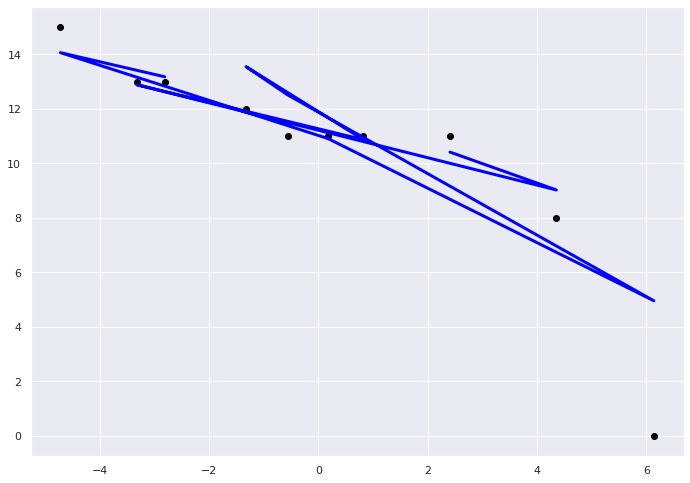

In [ ]:

plt.scatter(plot_x_test[:10], y_test[:10], color="black")
plt.plot(plot_x_test[:10], y_pred[:10], color="blue", linewidth=3)
